# Ejercicio 2

**Nombre**: Juan Valdiviezo

## Ejercicio 2.2

Analice y ejecute el código a continuación

In [84]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [85]:
irisdata = pd.read_csv('iris.csv')

# se transforma el tipo de dato de la columna species para que sea categórico
irisdata["species"] = irisdata["species"].astype("category")

In [86]:
print(irisdata.head())
print(irisdata.info())
print(irisdata.describe())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000

In [87]:
irisdata['species'].value_counts()  # el problema tiene categorías con el mismo número de elementos

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

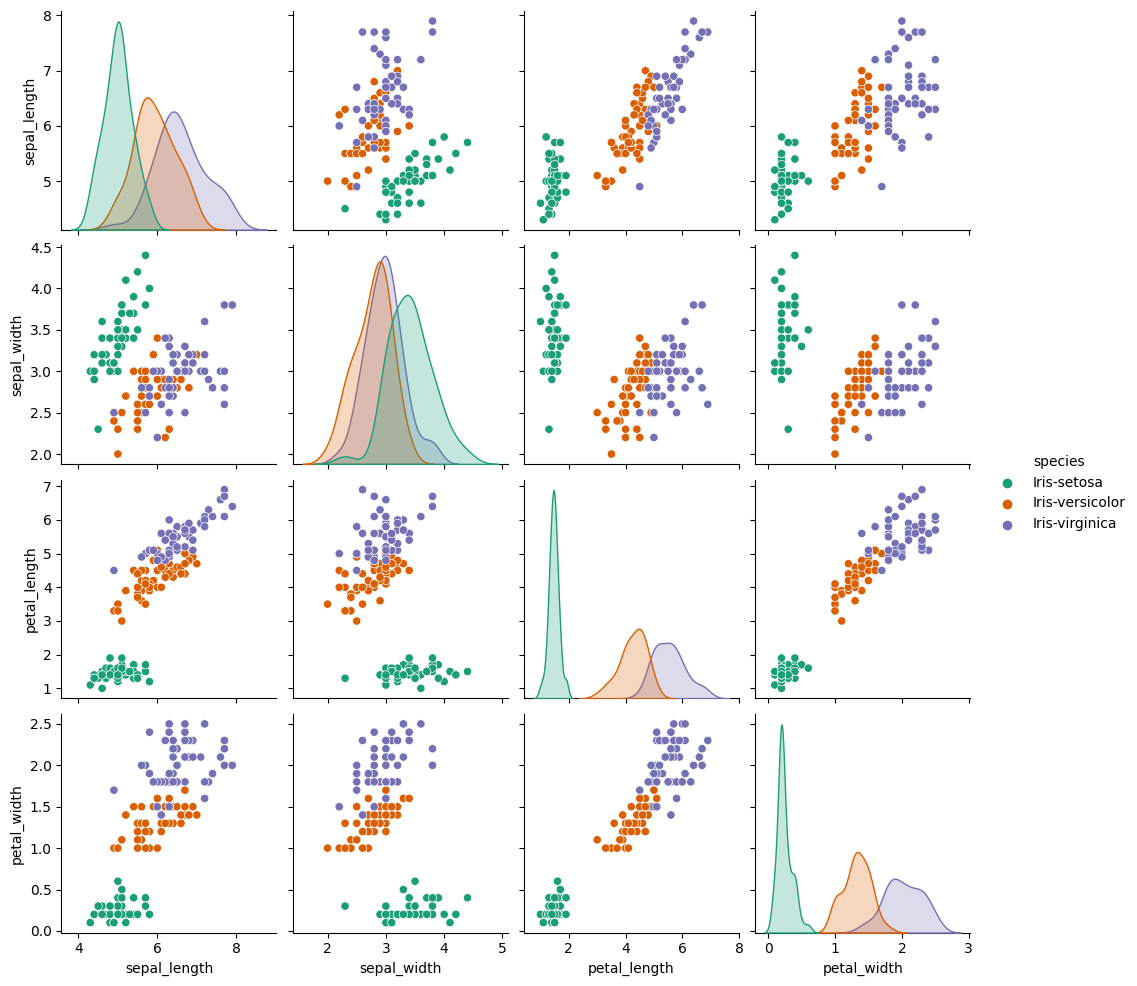

In [88]:
import seaborn as sns
sns.pairplot(irisdata,hue='species',palette='Dark2')

In [89]:
from sklearn.model_selection import train_test_split
X = irisdata.drop('species', axis=1)
y = irisdata['species']

# para mostrar superficies, se utilizan solo 2 columnas

X = irisdata[['sepal_length', 'sepal_width']].to_numpy()
y = irisdata["species"].cat.codes.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [90]:
# kernels a ser probados
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

def getClassifier(ktype):
    """Función que retorna el modelo correspondiente de SVC y su denominación
    """
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto"), "poly"
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto"), "rbf"
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto"), "sigmoid"
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto"), "linear"

In [91]:
def mostrar_regiones(x, y, clf, title):
    """Muestra las regiones de decisión de un modelo SVC
    """

    # Plotting decision regions
    plot_decision_regions(x, y, clf=clf, legend=2)

    # muestra los support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

    # muestra las etiquetas en x y y
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title(title)
    plt.show()


Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      0.80      0.75        15
           2       0.62      0.50      0.56        10

    accuracy                           0.73        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.73      0.73      0.73        30



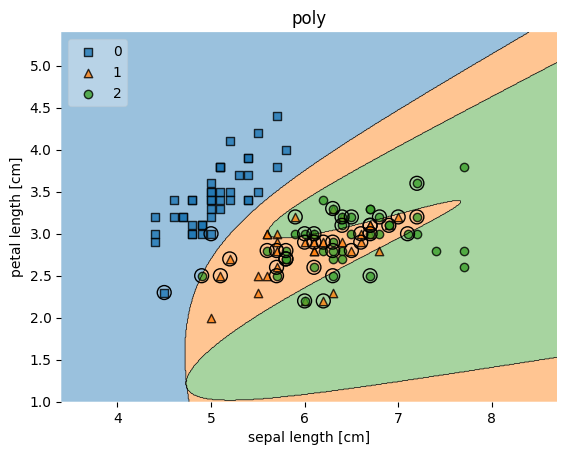

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.55      0.86      0.67         7
           2       0.86      0.55      0.67        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.78        30
weighted avg       0.84      0.80      0.80        30



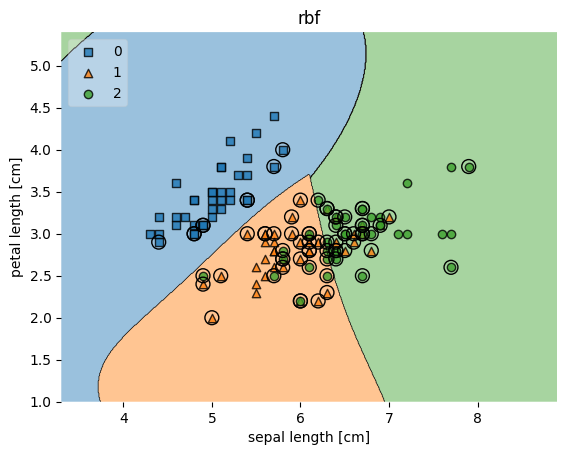

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        11
           2       0.20      1.00      0.33         6

    accuracy                           0.20        30
   macro avg       0.07      0.33      0.11        30
weighted avg       0.04      0.20      0.07        30



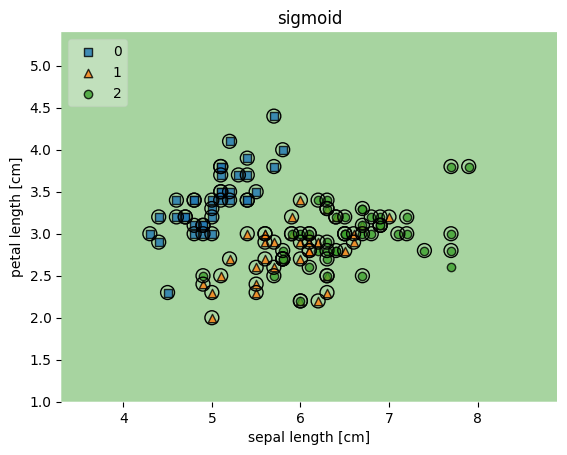

Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.80      0.76        10
           2       0.75      0.67      0.71         9

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.83      0.83      0.83        30



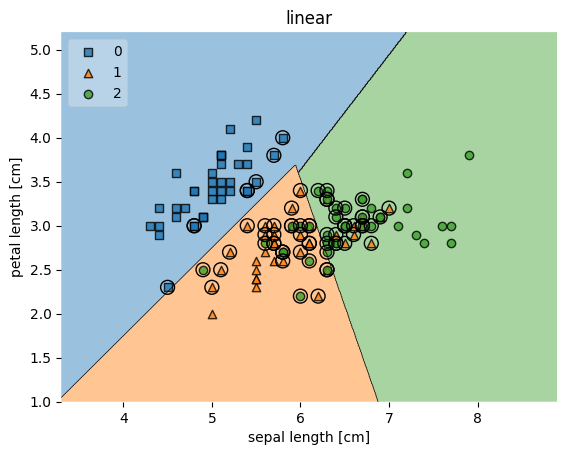

In [92]:
for i in range(len(kernels)):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

    # Train a SVC model using different kernel
    svclassifier, n_classifier = getClassifier(i)
    svclassifier.fit(X_train, y_train)

    # Make prediction
    y_pred = svclassifier.predict(X_test)

    # Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

    mostrar_regiones(X_train, y_train, svclassifier, n_classifier)


## Ejercicio 2.2

Analice los resultados <br><br>
**¿Existe alguna combinación de hyper-parámetros que clasifique correctamente al problema?** <br>

Sí, la combinación de hyper-parámetros que clasifica correctamente al problema es la siguiente:

- kernel = 'rbf'

Gamma: 0.2120451043497519


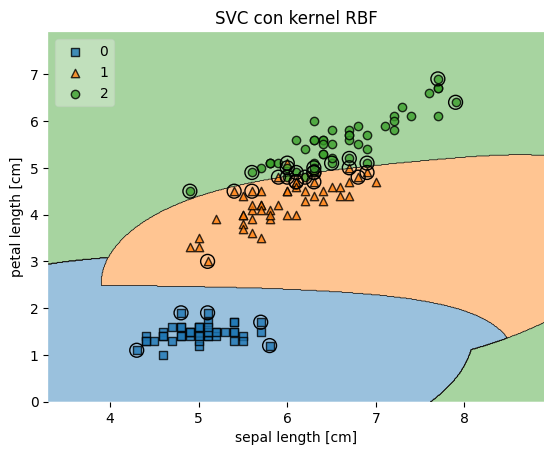

Reporte:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.92      0.94        50
           2       0.92      0.96      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [93]:
#Tomando a C = 10 y gamma como 1/2 * X_var()
gamma = 1/(2 * np.var(X_train))
print("Gamma:", gamma)
C = 10
#Tomamos petal length y sepal length
X = irisdata[['sepal_length', 'petal_length']].to_numpy()
target = irisdata["species"].cat.codes.to_numpy()

clf = SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X, target)

mostrar_regiones(X, target, clf, "SVC con kernel RBF")

print(f"Reporte: {classification_report(target, clf.predict(X))}")


**¿Alguna combinación produce visiblemente overfitting?**

En el caso de que se utilice el kernel 'rbf' con los hyper-parámetros C = 10 y gamma = 100, se produce overfitting. Esto se explica porque el valor de gamma es alto y por lo tanto, el modelo se ajusta demasiado a los datos de entrenamiento que son las instancias que le quedan más cerca.

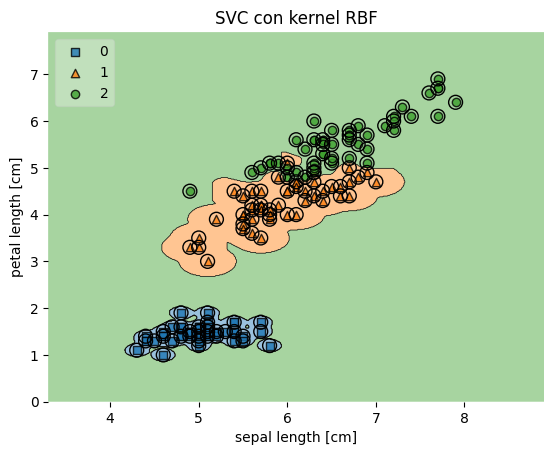

Reporte:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [94]:
#Tomando a C = 10 y gamma como 100
gamma = 100
C = 10
#Tomamos petal length y sepal length
X = irisdata[['sepal_length', 'petal_length']].to_numpy()
target = irisdata["species"].cat.codes.to_numpy()

clf = SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X, target)

mostrar_regiones(X, target, clf, "SVC con kernel RBF")

print(f"Reporte: {classification_report(target, clf.predict(X))}")

En el reporte se aprecia que el modelo se memoriza completamente los datos de entrenamiento, pero no logrará generalizar bien con datos nuevos.

## Ejercicio 2.3

Determine los valores de hyper-parámetros: <br><br>
Seleccione manualmente (prueba/error) valores de hyper-parámetros que le proven resultados satisfactorios para este problema. Muestre la matriz de confusión de los resultados.

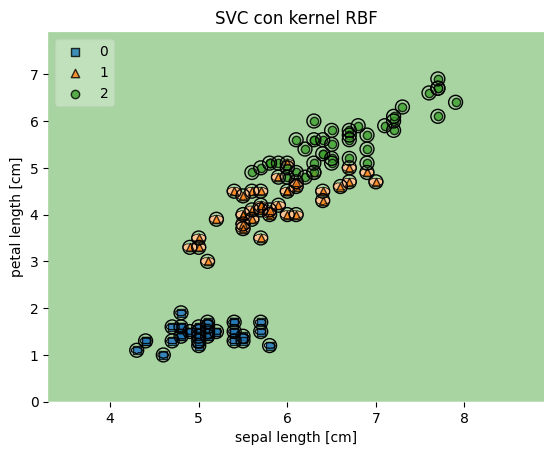

[[ 3  0  9]
 [ 0  1 11]
 [ 0  0  6]]


In [108]:
# Probando con C = 100 y gamma como 500
gamma = 500
C = 100
#Tomamos petal length y sepal length
X = irisdata[['sepal_length', 'petal_length']].to_numpy()
target = irisdata["species"].cat.codes.to_numpy()

#Usamos el 80% de los datos para entrenamiento y el 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20)

clf = SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X_train, y_train)

mostrar_regiones(X_train, y_train, clf, "SVC con kernel RBF")

#Matriz de confusión
print("Matriz de confusión: ")
print(confusion_matrix(y_test, clf.predict(X_test)))



En este caso, al dar un valor muy elevado de gamma, el modelo se sobreajustó a los datos de entrenamiento y no logró generalizar bien con datos nuevos. Por lo tanto, se decidió disminuir el valor de gamma.
En la matriz de confusión se puede apreciar como falla en casi todas las predicciones de la clase 1, pero acierta en todas las predicciones de la clase 2.

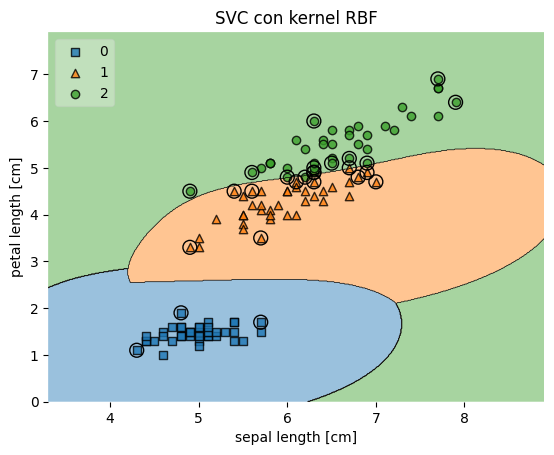

[[ 8  0  0]
 [ 0  8  2]
 [ 0  0 12]]


In [106]:
# Probando con C = 5 y gamma como 0.5
gamma = 0.5
C = 5
#Tomamos petal length y sepal length
X = irisdata[['sepal_length', 'petal_length']].to_numpy()
target = irisdata["species"].cat.codes.to_numpy()

#Usamos el 80% de los datos para entrenamiento y el 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20)

clf = SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X_train, y_train)

mostrar_regiones(X_train, y_train, clf, "SVC con kernel RBF")

#Matriz de confusión
print("Matriz de confusión: ")
print(confusion_matrix(y_test, clf.predict(X_test)))


Al disminuir el valor de gamma a 0.5, el modelo logra generalizar mejor con datos nuevos y se puede apreciar en la matriz de confusión que acierta en todas las predicciones de la clase 0 y falla en dos predicciones de la clase 1.

## Ejercicio 2.4

Tuneando parámetros automáticamente: <br><br>

El código a continuación implementa un "grid-search" para determinar la combinación de hyper-parámetros más optima para el problema.

Ejecutar el código a continuación y compare los hyper-parámetros seleccionados en el ejercicio 2.3 y 2.4

### Tuneando parámetros

In [96]:
from sklearn.model_selection import GridSearchCV


In [97]:
param_grid = {
    'C': [0.01, 0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [98]:
grid = GridSearchCV(SVC(), param_grid,refit=True, verbose=2)  # verbose se usa solo para efectos de demostración
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [99]:
# el mejor modelo aprendido
print(grid.best_estimator_)


SVC(C=0.1, gamma=1)


In [100]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[11  0  0]
 [ 0  7  3]
 [ 0  3  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.70      0.70      0.70        10
           2       0.67      0.67      0.67         9

    accuracy                           0.80        30
   macro avg       0.79      0.79      0.79        30
weighted avg       0.80      0.80      0.80        30



#### Comparación de los hyper-parámetros seleccionados en el ejercicio 2.3 y 2.4

En el ejercicio 2.3 se seleccionó los hyper-parámetros C = 10 y gamma = 0.5, mientras que en el ejercicio 2.4 se seleccionó los hyper-parámetros mediante un grid-search, lo que permite optimizar los hyper-parámetros de manera automática. En la matriz de confusión se puede apreciar que el modelo seleccionado en el ejercicio 2.4 tiene un mejor desempeño que el modelo seleccionado en el ejercicio 2.3.

Esto es porque el grid-search permite probar todas las combinaciones de hyper-parámetros y seleccionar la combinación que mejor desempeño tenga.

## Ejercicio 2.5

La normalización de datos en Machine Learning es un proceso típicamente utilizado para que variables de gran magnitud no dominen los cálculos del modelo. Para ello, implemente un grid-search para el problema; pero antes, transforme el vector de características para que cada variable tenga un rango entre 0 y 1.

Para ello, averigue el uso de la función `MinMaxScaler` del paquete `sklearn.preprocessing`

¿Los resultados varían?

In [101]:
# Ingrese su código aquí


